<a href="https://colab.research.google.com/github/sora3765/regression-analysis-sales-forecast/blob/main/1_1_%E5%8D%98%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline


In [3]:
f = 123.456789

f
# 123.456789

%precision 3
# '%.3f'

f
# 123.457


123.457

In [4]:
!git clone https://github.com/umacchi/python-regression-tutorial-data datasets

Cloning into 'datasets'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 31 (delta 3), reused 30 (delta 2), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [5]:
df = pd.read_csv("/content/datasets/test.csv")
n = len(df)
print(n)
df.head()


20


,monday_sales,week_sales,customer_traffic,weather
0,4.2,67,7.2,Sunny
1,7.2,71,7.9,Cloudy
2,2.0,30,5.3,Sunny
3,3.0,35,6.8,Rainy
4,1.5,35,7.5,Rainy


In [6]:
x = np.array(df['monday_sales'])
y = np.array(df['week_sales'])
p = 1

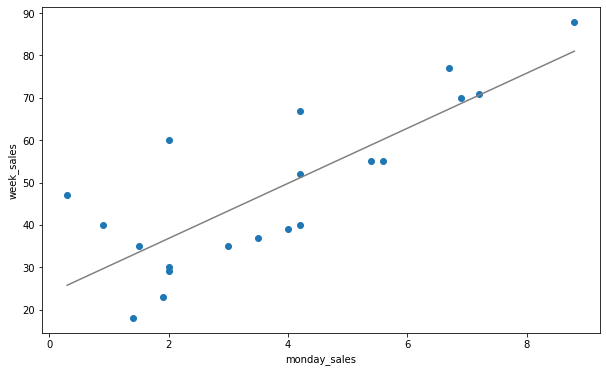

In [8]:
# 単回帰式を作成
poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
x_min = x.min()
x_max = x.max()
xs = np.linspace(x_min, x_max)
ys = poly_1d(xs)

# 散布図と回帰直線を描画
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, xlabel="monday_sales", ylabel="week_sales")
ax.plot(xs, ys, color="gray")

ax.scatter(x, y)


In [9]:
formula = 'week_sales ~ monday_sales'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             week_sales   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     33.24
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           1.83e-05
Time:                        00:34:49   Log-Likelihood:                -76.423
No. Observations:                  20   AIC:                             156.8
Df Residuals:                      18   BIC:                             158.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       23.7942      4.999      4.759      0.000      13.291      34.298
monday_sales     6.5009      1.128      5.766      0.000       4.132       8.870
==============================================================================
Omnibus:                        2.137   Durbin-Watson:                   1.471
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                1.783
Skew:                           0.662   Prob(JB):                        0.410
Kurtosis:                       2.377   Cond. No.                         8.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
formula = 'week_sales ~ monday_sales'


In [11]:
# 最小二乗法でβ0とβ1を求める
X = np.array([np.ones_like(x), x]).T
X


array([[1. , 4.2],
       [1. , 7.2],
       [1. , 2. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [12]:
# 最小二乗法を実行して、推定値の推定
beta_hat, alfa_hat = np.linalg.lstsq(X, y, rcond=None)[0]
beta_hat, alfa_hat
# [出力結果]
# (23.794, 6.501)


(23.79415556107645, 6.500883603414412)

In [13]:
# yの推定値を求める
y_hat = beta_hat + alfa_hat * x
# 残差を求める
eps_hat = y - y_hat
eps_hat


array([ 15.902,   0.399,  -6.796,  -8.297,   1.455,  10.355, -13.146,
        -9.547, -10.798,  -3.899, -11.098,   1.35 ,  -7.796,   6.998,
        21.256,   9.65 ,   0.902,  -5.199, -14.895,  23.204])

In [14]:
# 残差を使って、母分散を推定
s_var = np.var(eps_hat, ddof=p+1)
s_var
# [出力結果]
# 135.609


135.60873842890987

In [15]:
#β0とβ1の区間推定
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))
# 標準誤差を出力
print(np.sqrt(s_var * C0))
print(np.sqrt(s_var * C1))


4.999402295059586
1.1275397235202085


In [16]:
# まずはt分布を作成
rv = stats.t(n-2)

#  βの95%信頼区間を求める
lcl = beta_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
hcl = beta_hat - rv.isf(0.975) * np.sqrt(s_var * C0)
print(lcl)
print(hcl)


13.290801091354526
34.29751003079838


In [17]:
# αの95%信頼区間を求める
rv = stats.t(n-2)

lcl = alfa_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = alfa_hat - rv.isf(0.975) * np.sqrt(s_var * C1)
print(lcl)
print(hcl)


4.132010547023608
8.869756659805216


In [18]:
t = alfa_hat / np.sqrt(s_var * C1)
t
# [出力結果]
5.766


5.766

In [20]:
p = (1 - rv.cdf(t)) * 2
p
# [出力結果]
0.000


0.000

In [21]:
p = (1 - rv.cdf(t)) * 2
